In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from matplotlib import cm

In [3]:
G = 6.674e-11    # gravitational constant 

Re = 6371e3      # radius of earth (m)
Me = 5.972e24    # mass of earth (kg)

Mm = 7.348e22    # mass of moon (kg)
Rm = 3.844e8     # distance moon to earth (m)

Ms = 1.989e30    # mass of sun (kg)
Rs = 149.6e9     # distance sun to earth (m)

g = G*Me/Re**2

epsilon = 1.5*G*Mm*Re / Rm**3
print('Maximum perturbation of g = %.2f m/s^2 is epsilon = %.3e m/s^2' % (g, epsilon))

Maximum perturbation of g = 9.82 m/s^2 is epsilon = 8.251e-07 m/s^2


In [13]:
cosd = lambda x: cos(x*pi/180)
sind = lambda x: sin(x*pi/180)

def eta(lam, phi, beta=0.):
    cos_theta = cosd(lam)*cosd(phi)*cosd(beta) + sind(phi)*sind(beta)
    cos_2theta = 2*cos_theta**2 - 1.
    eta = epsilon*Re/(2*g) * cos_2theta
    return eta

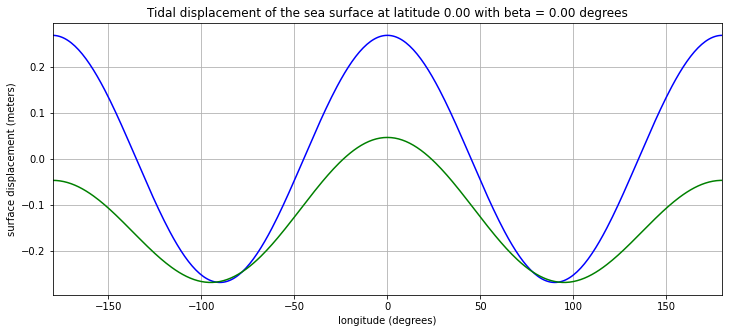

In [5]:
lam = linspace(-180,180,361)  # longitudes
phi = 0.  # latitude
beta = 0. # lunar elevation

figure(figsize=(12,5))
plot(lam, eta(lam,0,0), 'b')
plot(lam, eta(lam,45,5), 'g')
xlim(-180,180)
xlabel('longitude (degrees)')
ylabel('surface displacement (meters)')
ticklabel_format(useOffset=False)
grid(True)
title('Tidal displacement of the sea surface at latitude %.2f with beta = %.2f degrees' \
       % (phi,beta));

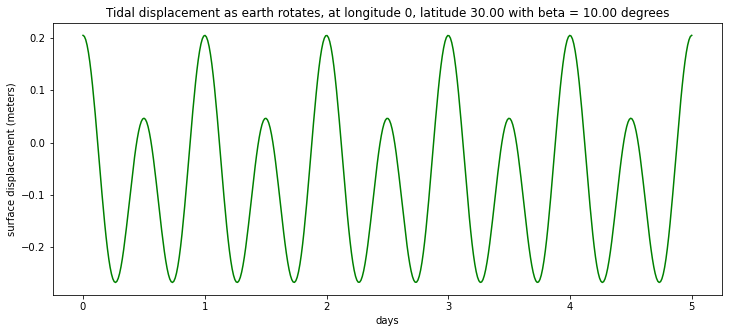

In [6]:
figure(figsize=(12,5))
lam = linspace(0,5*360,5*90)
#plot(lam, eta(lam,0,0), 'b')
beta = 10.
phi = 30.
plot(lam/360, eta(lam,phi,beta), 'g')
xlabel('days')
ylabel('surface displacement (meters)')
ticklabel_format(useOffset=False)
title('Tidal displacement as earth rotates, at longitude 0, latitude %.2f with beta = %.2f degrees' \
       % (phi,beta));

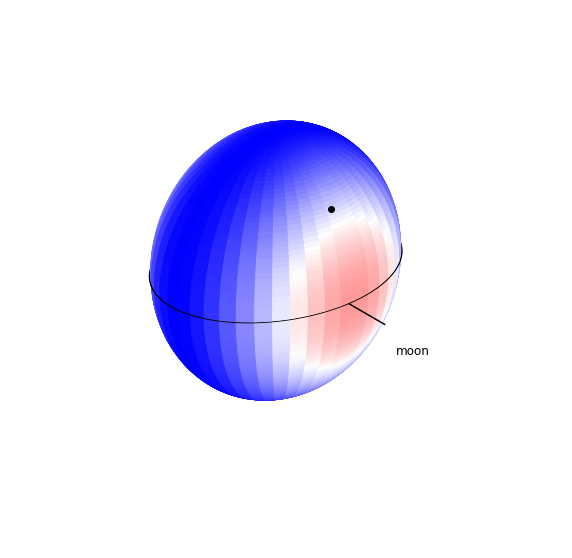

In [7]:

fig = figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

# Create the mesh in polar coordinates
lam = linspace(-180, 180, 361)
phi = linspace(0,90,46)
Lam,Phi = meshgrid(lam,phi)

# Express the mesh in the cartesian system.
X, Y = cosd(Lam)*cosd(Phi), sind(Lam)*cosd(Phi)

beta = 0.
cmap = cm.bwr

# Elevation in northern hemisphere:
Z = sind(Phi)

# Define function on surface and normalize for face colors:
ffcn = eta(Lam,Phi,beta)
fmax, fmin = ffcn.max(), ffcn.min()
fcolors = 0.7*(ffcn - fmin)/(fmax - fmin)

# Plot the surface.
ax.plot_surface(X, Y, Z, facecolors=cmap(fcolors), shade=False)

# Elevation in southern hemisphere:
Z = -sind(Phi)

# Define function on surface and normalize for face colors:
ffcn = eta(Lam,Phi,beta)
fmax, fmin = ffcn.max(), ffcn.min()
fcolors = 0.7*(ffcn - fmin)/(fmax - fmin)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, facecolors=cmap(fcolors), shade=False)
surf.set_clim(-2,2)

ax.plot([0,1.5],[0,0],[0,0],color='k',zorder=3)
ax.text(1.8,-.1,-.1,'moon', fontsize=12)
ax.plot(1.01*cosd(lam), 1.01*sind(lam), zeros(lam.shape),color='k',zorder=3)
phi0 = 40
#ax.plot(cosd(lam)*cosd(phi0), sind(lam)*cosd(phi0), sind(phi0)*ones(lam.shape), 'r', zorder=4)
ax.plot([cosd(phi0)], [0], [sind(phi0)], 'ko', zorder=4)

# Tweak the limits
ax.set_zlim(-1, 1)
#ax.set_aspect('equal') # not allowed
#fig.colorbar(surf)
ax.set_axis_off();
ax.view_init(elev=30, azim=-40)

In [8]:

def make_plots(phi0, beta=0.):
    fig = figure(figsize=(10,10))
    ax = fig.add_subplot(projection='3d')

    # Create the mesh in polar coordinates
    lam = linspace(-180, 180, 361)
    phi = linspace(0,90,46)
    Lam,Phi = meshgrid(lam,phi)

    # Express the mesh in the cartesian system.
    X, Y = cosd(Lam)*cosd(Phi), sind(Lam)*cosd(Phi)

    cmap = cm.bwr

    # Elevation in northern hemisphere:
    Z = sind(Phi)

    # Define function on surface and normalize for face colors:
    ffcn = eta(Lam,Phi,beta)
    fmax, fmin = ffcn.max(), ffcn.min()
    fcolors = 0.7*(ffcn - fmin)/(fmax - fmin)

    # Plot the surface.
    ax.plot_surface(X, Y, Z, facecolors=cmap(fcolors), shade=False)

    # Elevation in southern hemisphere:
    Z = sind(-Phi)

    # Define function on surface and normalize for face colors:
    ffcn = eta(Lam,-Phi,beta)
    fmax, fmin = ffcn.max(), ffcn.min()
    fcolors = 0.7*(ffcn - fmin)/(fmax - fmin)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, facecolors=cmap(fcolors), shade=False)
    surf.set_clim(-2,2)

    #ax.plot([0,1.5],[0,0],[0,0],color='k',zorder=3)
    #ax.text(1.8,-.1,-.1,'moon', fontsize=12)
    ax.plot(1.01*cosd(lam), 1.01*sind(lam), zeros(lam.shape),color='k',zorder=3)
    #ax.plot(cosd(lam)*cosd(phi0), sind(lam)*cosd(phi0), sind(phi0)*ones(lam.shape), 'r', zorder=4)
    ax.plot([cosd(phi0)], [0], [sind(phi0)], 'ko', zorder=4)

    # Tweak the limits
    ax.set_zlim(-1, 1)
    #ax.set_aspect('equal') # not allowed
    #fig.colorbar(surf)
    ax.set_axis_off();
    ax.view_init(elev=30, azim=-40)

    figure(figsize=(12,5))
    lam = linspace(0,5*360,5*90)
    plot(lam/360, eta(lam,phi0,beta), 'g')
    plot(lam/360, 0*lam, 'k')
    xlim(0,5)
    ylim(-0.3, 0.3)
    xlabel('days')
    ylabel('surface displacement (meters)')
    ticklabel_format(useOffset=False)
    title('Tidal displacement as earth rotates, at longitude 0, latitude %.2f with beta = %.2f degrees' \
           % (phi0,beta));

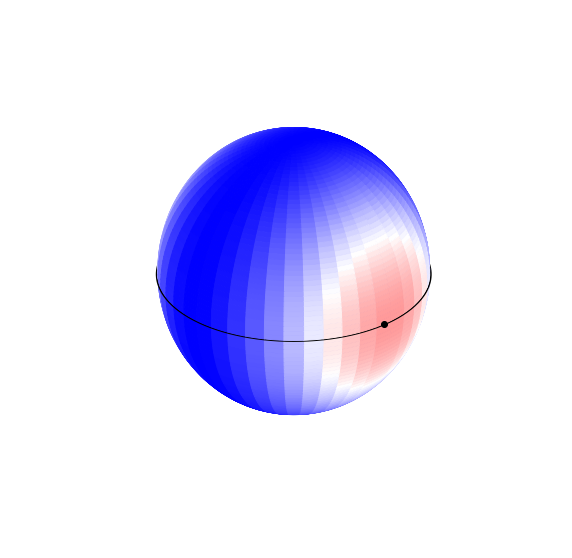

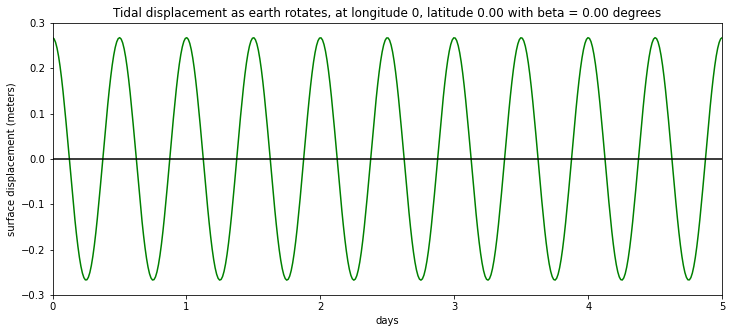

In [9]:
make_plots(0,0)

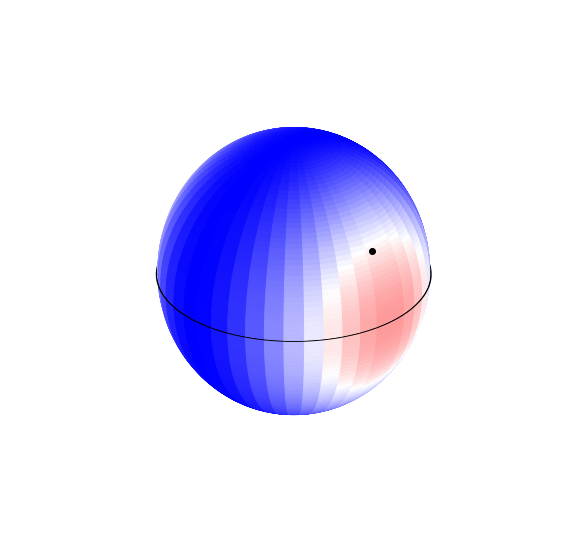

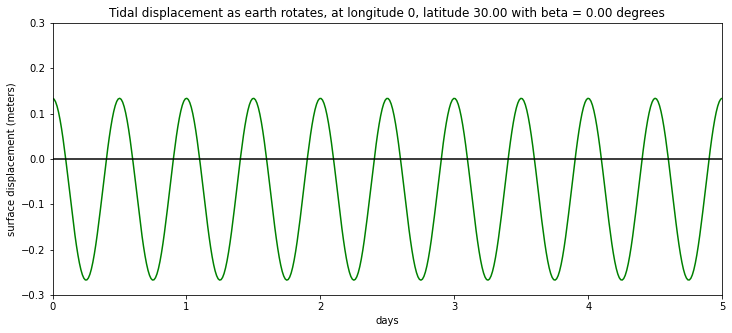

In [10]:
make_plots(30,0)

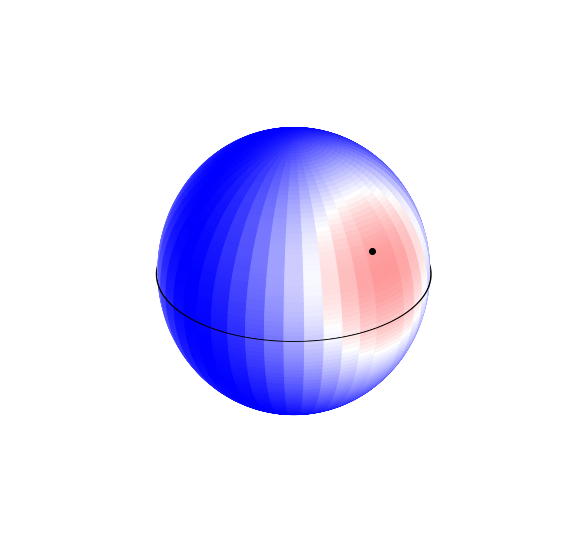

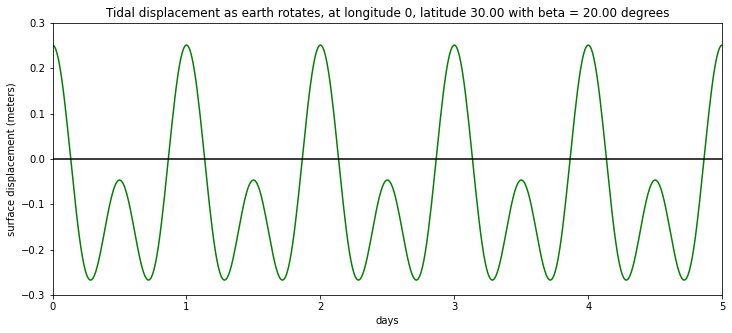

In [11]:
make_plots(30,20)

In [12]:
radians?